### Importing different libraries for the project

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn
from IPython.display import Image
import pydotplus
import graphviz 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

### Loading individual csv files for the project

In [47]:
df = pd.read_csv("ML case Study.csv",header = 0)
df_Colleges = pd.read_csv("Colleges.csv",header = 0)
df_Cities = pd.read_csv("cities.csv",header = 0)

In [48]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [5]:
df_Colleges.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [6]:
df_Cities.head()

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode

## 1). Starting Data Pre-processing

#### Converting the imported dataset into lists¶

In [49]:
Tier1 = df_Colleges["Tier 1"].tolist()

In [50]:
Tier2 = df_Colleges["Tier 2"].tolist()

In [51]:
Tier3 = df_Colleges["Tier 3"].tolist()

In [52]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace = True)

In [11]:
df.head()

College             City       Role  Previous CTC  Previous job change  \
0        2          Asansol    Manager       55523.0                    3   
1        2            Ajmer  Executive       57081.0                    1   
2        3  Rajpur Sonarpur  Executive       60347.0                    2   
3        3            Ajmer  Executive       49010.0                    2   
4        1         Durgapur  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10

In [53]:
Metro = df_Cities["Metrio City"].tolist()

In [54]:
Non_Metro = df_Cities["non-metro cities"].tolist()

In [55]:
for city in df.City:
    if city in Metro:
        df["City"].replace(city,1,inplace = True)
    elif city in Non_Metro:
        df["City"].replace(city,0,inplace = True)

In [15]:
df.head()

College  City       Role  Previous CTC  Previous job change  \
0        2     0    Manager       55523.0                    3   
1        2     0  Executive       57081.0                    1   
2        3     0  Executive       60347.0                    2   
3        3     0  Executive       49010.0                    2   
4        1     0  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10

### Checking for missing values in the csv file

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


### Creating Dummy Variables 

In [56]:
df = pd.get_dummies(df)

In [57]:
df.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0       55523.0                    3                66   
1        2     0       57081.0                    1                84   
2        3     0       60347.0                    2                52   
3        3     0       49010.0                    2                81   
4        1     0       57879.0                    4                74   

   EXP (Month)       CTC  Role_Executive  Role_Manager  
0           19  71406.58           False          True  
1           18  68005.87            True         False  
2           28  76764.02            True         False  
3           33  82092.39            True         False  
4           32  73878.10            True         False

In [58]:
print(df.dtypes)

College                  int64
City                     int64
Previous CTC           float64
Previous job change      int64
Graduation Marks         int64
EXP (Month)              int64
CTC                    float64
Role_Executive            bool
Role_Manager              bool
dtype: object


In [59]:
df['Role_Executive'] = df['Role_Executive'].astype(int)
df['Role_Manager'] = df['Role_Manager'].astype(int)

In [60]:
df.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0       55523.0                    3                66   
1        2     0       57081.0                    1                84   
2        3     0       60347.0                    2                52   
3        3     0       49010.0                    2                81   
4        1     0       57879.0                    4                74   

   EXP (Month)       CTC  Role_Executive  Role_Manager  
0           19  71406.58               0             1  
1           18  68005.87               1             0  
2           28  76764.02               1             0  
3           33  82092.39               1             0  
4           32  73878.10               1             0

### Checking for outliers in the csv file

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


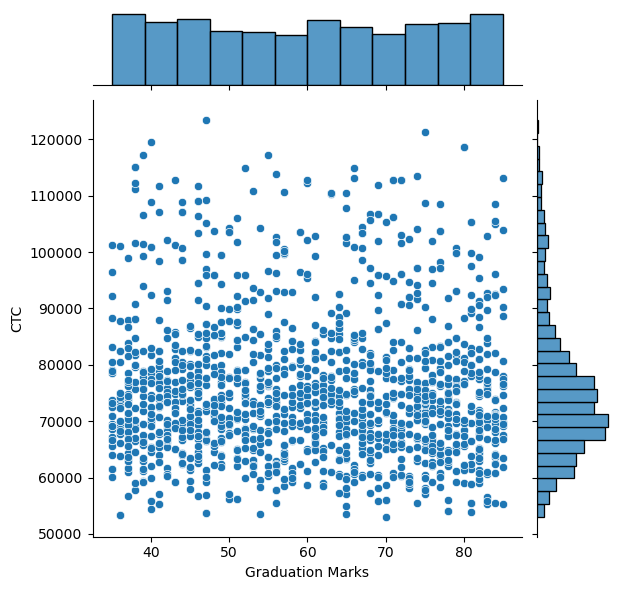

In [25]:
sns.jointplot(x = "Graduation Marks",y = "CTC",data = df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


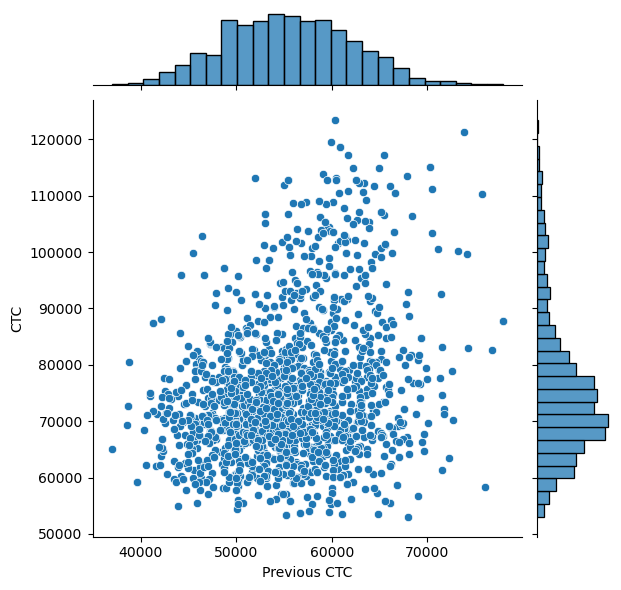

In [26]:
sns.jointplot(x = "Previous CTC",y = "CTC",data = df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


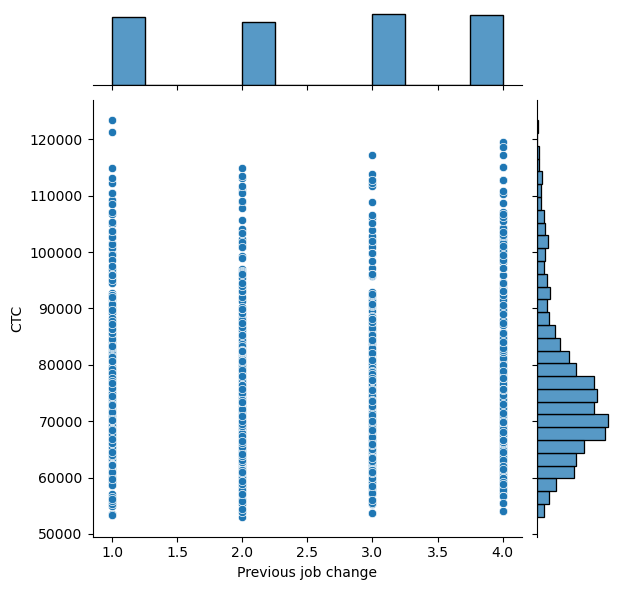

In [27]:
sns.jointplot(x = "Previous job change",y = "CTC",data = df)

## Data Algorithms Models

## A). Multi-Linear Regression

In [30]:
df.corr()

College      City  Previous CTC  Previous job change  \
College              1.000000 -0.014946      0.041979            -0.055060   
City                -0.014946  1.000000      0.004644             0.051670   
Previous CTC         0.041979  0.004644      1.000000             0.005756   
Previous job change -0.055060  0.051670      0.005756             1.000000   
Graduation Marks     0.003539 -0.018616     -0.032976             0.019267   
EXP (Month)          0.011752 -0.023613      0.119163             0.023488   
CTC                 -0.029592 -0.020365      0.258000             0.011370   
Role_Executive       0.014749  0.048671     -0.012321             0.017150   
Role_Manager        -0.014749 -0.048671      0.012321            -0.017150   

                     Graduation Marks  EXP (Month)       CTC  Role_Executive  \
College                      0.003539     0.011752 -0.029592        0.014749   
City                        -0.018616    -0.023613 -0.020365        0.048671   
Previous CTC                -0.032976     0.119163  0.258000       -0.012321   
Previous job change          0.019267     0.023488  0.011370        0.017150   
Graduation Marks             1.000000    -0.057061 -0.005450       -0.017858   
EXP (Month)                 -0.057061     1.000000  0.301115        0.026751   
CTC                         -0.005450     0.301115  1.000000       -0.621311   
Role_Executive              -0.017858     0.026751 -0.621311        1.000000   
Role_Manager                 0.017858    -0.026751  0.621311       -1.000000   

                     Role_Manager  
College                 -0.014749  
City                    -0.048671  
Previous CTC             0.012321  
Previous job change     -0.017150  
Graduation Marks         0.017858  
EXP (Month)             -0.026751  
CTC                      0.621311  
Role_Executive          -1.000000  
Role_Manager             1.000000

In [32]:
X_multi = df.loc[:, df.columns !="CTC"]

In [32]:
X_multi.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0       55523.0                    3                66   
1        2     0       57081.0                    1                84   
2        3     0       60347.0                    2                52   
3        3     0       49010.0                    2                81   
4        1     0       57879.0                    4                74   

   EXP (Month)  Role_Executive  Role_Manager  
0           19               0             1  
1           18               1             0  
2           28               1             0  
3           33               1             0  
4           32               1             0

In [33]:
y_multi = df['CTC']

In [34]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [35]:
X_multi_cons = sn.add_constant(X_multi)

In [36]:
X_multi_cons.head()

const  College  City  Previous CTC  Previous job change  Graduation Marks  \
0    1.0        2     0       55523.0                    3                66   
1    1.0        2     0       57081.0                    1                84   
2    1.0        3     0       60347.0                    2                52   
3    1.0        3     0       49010.0                    2                81   
4    1.0        1     0       57879.0                    4                74   

   EXP (Month)  Role_Executive  Role_Manager  
0           19               0             1  
1           18               1             0  
2           28               1             0  
3           33               1             0  
4           32               1             0

In [37]:
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

In [38]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 27 May 2024   Prob (F-statistic):          4.70e-257
Time:                        18:15:55   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.211e+04   1463.780     21.936      0.000    2.92e+04     3.5e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Executive       6311.2273    760.861      8.295      0.000    4818.825    7803.630
Role_Manager          2.58e+04    797.098     32.366      0.000    2.42e+04    2.74e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     1.00e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
lm_multi_lr = LinearRegression()

In [40]:
lm_multi_lr.fit(X_multi, y_multi)

LinearRegression()

In [41]:
print(lm_multi_lr.intercept_, lm_multi_lr.coef_)

48164.82373580469 [-4.81514705e+02  3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02 -9.74371393e+03  9.74371393e+03]


In [42]:
y_pred = lm_multi_lr.predict(X_multi)

In [43]:
mse = mean_squared_error(y_multi,y_pred)
r2 = r2_score(y_multi,y_pred)

In [44]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  73736458.29764368 
R2 Score - 0.5343159981702307


## B). Decision Trees Model

In [65]:
X = df.loc[:,df.columns!="CTC"]

In [66]:
y = df["CTC"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [68]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


In [69]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [70]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [71]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [73]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  60424631.02613478 
R2 Score - 0.592783161192491


In [74]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled = True)

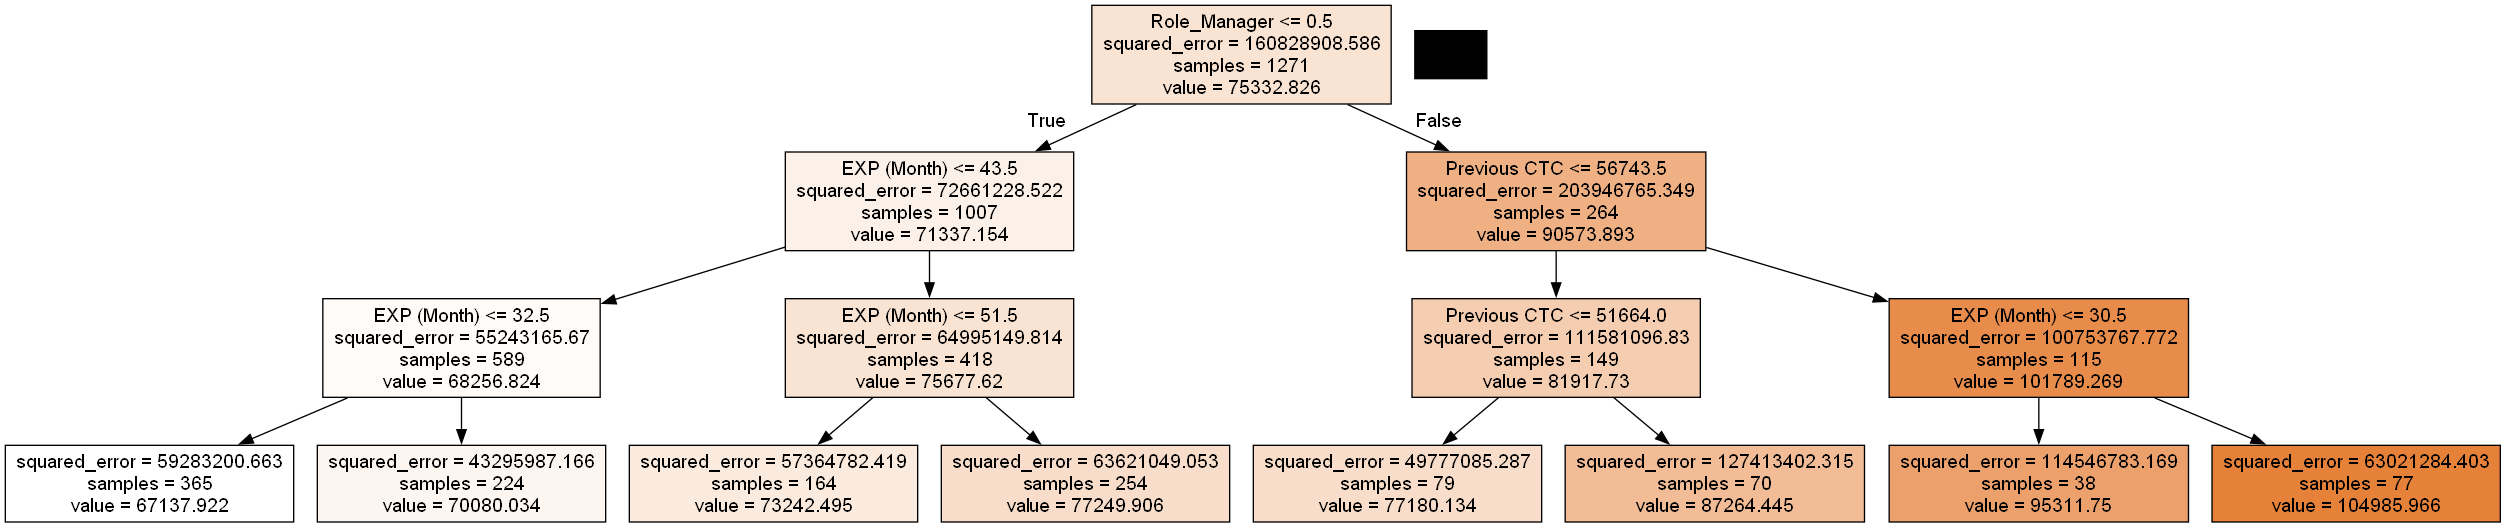

In [75]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## C). Random Forest Regressor

In [70]:
rf = RandomForestRegressor(n_estimators=250, random_state=42)  

In [71]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [72]:
predictions = rf.predict(X_test)

In [73]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [74]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  50230097.349703275 
R2 Score - 0.6614866965940986


## D). Ridge Regression

In [75]:
scaler = StandardScaler()

In [76]:
scaler.fit(X_train)

StandardScaler()

In [77]:
X_train_s = scaler.transform(X_train)

In [78]:
X_test_s = scaler.transform(X_test)

In [80]:
lm_r = Ridge(alpha = 0.5)

In [81]:
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [82]:
y_pred = lm_r.predict(X_test_s)

In [83]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [84]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  68910404.93750553 
R2 Score - 0.5355953891144283


#### Change of Hyper Parameters

In [86]:
from sklearn.model_selection import validation_curve

In [87]:
param_range = np.logspace(-2,8,100)

In [88]:
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [89]:
train_mean = np.mean(train_scores, axis = 1)

In [90]:
test_mean = np.mean(test_scores, axis = 1)

In [91]:
max(test_mean)

0.5258388482080626

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


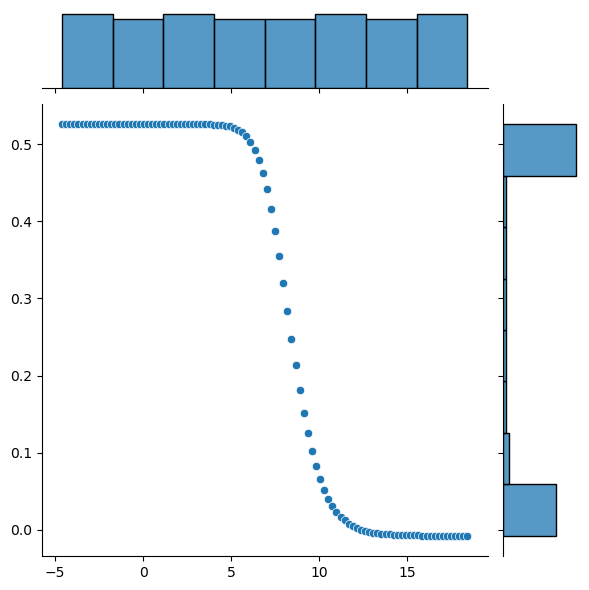

In [92]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [93]:
np.where(test_mean == max(test_mean))

(array([30], dtype=int64),)

In [94]:
param_range[30]

10.722672220103231

In [95]:
lm_r_best = Ridge(alpha = param_range[30])

In [96]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

In [97]:
y_pred_best = lm_r.predict(X_test_s)

In [98]:
r2_score(y_test,y_pred_best)

0.5355953891144283

## E). Lasso Regression

In [99]:
lm_s = Lasso(alpha = 0.5)

In [100]:
lm_s.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [101]:
y_pred = lm_s.predict(X_test_s)

In [102]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [103]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  68908896.5345529 
R2 Score - 0.5356055546226256


#### Change of Hyper Parameters

In [104]:
from sklearn.model_selection import validation_curve

In [105]:
param_range = np.logspace(-2,8,100)

In [106]:
train_scores, test_scores = validation_curve(
  Lasso(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [107]:
train_mean = np.mean(train_scores, axis = 1)

In [108]:
test_mean = np.mean(test_scores, axis = 1)

In [109]:
max(test_mean)

0.525834018854759

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


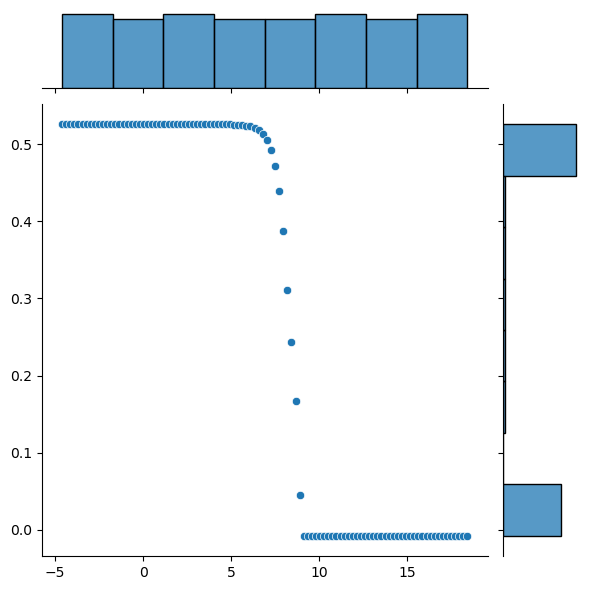

In [110]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [111]:
np.where(test_mean == max(test_mean))

(array([36], dtype=int64),)

In [112]:
param_range[36]

43.28761281083057

In [113]:
lm_s_best = Lasso(alpha = param_range[36])

In [114]:
lm_s_best.fit(X_train_s,y_train)

Lasso(alpha=43.28761281083057)

In [115]:
y_pred_best = lm_s.predict(X_test_s)

In [116]:
r2_score(y_test,y_pred_best)

0.5356055546226256

## F). Gradient Boosting Regressor

In [117]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [118]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=42)

In [119]:
pred = model.predict(X_test)

In [120]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)

In [121]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  54502725.99793167 
R2 Score - 0.6326923737826373


## G). XGBoost Regressor

In [61]:
xgb_m = XGBRegressor(n_estimators = 250, max_depth = 5, learning_rate = 0.1)

In [76]:
xgb_m.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
pred = xgb_m.predict(X_test)

In [78]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [79]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  55072459.2520754 
R2 Score - 0.6288527975903461


## Questions and Answers for the project

#### Question 1 - Your views about the problem statement?

#### Answer 1 - 
The problem statement highlights the critical business challenges of determining the salaries for newly hired employees.
TechWorks Consulting emphasis is on considering various factors like College, City, Previous Job Change, Graduation Marks, 
Experience (in months), Role and CTC. The idea is to create a machine learning model which will help in determining the salary of newly hired employees using the given data. This will help in automating the whole process removing any human bias and also, optimizing the salary prediction model based on the provided dataset.

#### Question 2 - What will be your approach to solving this task?

####   Answer - 2) 
Data Preprocessing:-
a). Categorical Variables : By analyzing the data set, the data contains categorical columns name "College" & "City", the college and city data are provided in another dataset so I loaded the dataset using pandas and then categorized the data according to the code given in the Q&A section of internshala training by converting the columns of the dataset into lists.

b). Missing Values: By analyzing the provided data set, I found that the data does not contain any missing values.

c). Dummy Variable: Categorized the Role column data by creating dummy variables. Now the problem was that the role column dummy variable created boolean datatype values in the Role_Executive and Role_Manager columns. These columns with boolean datatype were then converted to integer datatype columns. Thereafter, both the columns had integer values of 0 and 1.

d). Outliers : By analyzing the provided data set and then visualizing it in scatter_plot, the data does not contain any Outliers.

2)After Data Pre-processing, we applied different ml models like Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, Random Forest Regression, Gradient Boost Regressor and XGBoost Regressor.

3). Afterwards,  I employed several performance metrics like Mean Squared Error (MSE), R-Squared, Adjusted R-Squared to evaluate model performance on the validation set and also applied parameters like learning rate, number of trees/estimators for optimal performance.

#### Question 3 - What were the available ML model options you had to perform this task? 

#### Answer 3 -
Available ML Model Options were:
a). Linear Regression
b). Decision Tree Regressor
c). Random Forest Regressor
d). Ridge Regression
e). Lasso Regression
f). Gradient Boosting Regressor
g). XGBoost Regressor

#### Question 4 - Which model's performance is best and what could be the possible reason for that?

#### Answer 4 - 
Accuracies or R2_scores of ML models:-
1). Linear Regression - 0.5343159981702307
2). Decision Tree Regression - 0.5927831611924911
3). Random Forest Regression - 0.6614866965940986
4). Ridge Regression - 0.5355953891144283
5). Lasso Regression - 0.5356055546226256
6). Gradient Boosting Regressor - 0.6326923737826373
7). XGBoost Regressor - 0.6288527975903461

As we can see the highest R2 score is of Random Forest Regression. Hence, The Random Forest Regression is the best model as per the given dataset.

#### Question 5 - What steps can you take to improve this selected model's performance even further?

#### Answer 5 - 
Steps to improve performance would be -
1). Gathering More Data: More data will significantly improve the model's ability to generalize.
2). Feature analysis: Analyzing the individual feature scores to understand which features will have the most impact on salary predictions.
3). Early stopping: Implementing early stopping to prevent overfitting. 

## My Project Ends Here